In [2]:
#Import SK Learn libraries as well as panda numpy and plotting
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
%matplotlib inline

/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load Data
Load Banking behavioral data to predict the credit risk: 

We have created 3 dataframe test, train and sample submission

In [3]:
bank_train = pd.read_csv('/Users/chetu/Downloads/DataSet 2/Train.csv')
bank_test = pd.read_csv('/Users/chetu/Downloads/DataSet 2/Test.csv')
bank_sample = pd.read_csv('/Users/chetu/Downloads/DataSet 2/Sample_submission.csv')

/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Look data sample for training and testing data

In [4]:
print('='*10, 'Training Data')
print(bank_train.head())

print('='*10, 'Testing Data')
print(bank_train.head())

========== Training Data
        Col1  Col2          Col3          Col4          Col5          Col6  \
0    RIGHGSN     1  1.086711e+04  8.648345e+03  1.576618e+04  2.890466e+04   
1  RIMHI5ZGP     0  2.584312e+05  2.179633e+05  1.866287e+05  1.866287e+05   
2  RIHOG1SZU     0  1.459355e+07  1.260060e+07  1.100315e+07  1.010315e+07   
3  RIHOLMQWU     0  6.727043e+05  8.181116e+05  6.794893e+05  6.794893e+05   
4  RIHO584ET     0 -1.218742e+06 -3.005361e+06 -1.666241e+05 -2.403574e+06   

           Col7          Col8          Col9         Col10   ...     Col2388  \
0  5.273655e+03  2.346153e+04  1.285597e+04  2.871509e+04   ...           0   
1  2.154519e+05  1.923615e+05  1.726538e+05  1.666974e+05   ...           0   
2  1.879882e+07  1.514035e+07  5.320778e+06  6.906324e+06   ...           0   
3  8.257254e+05  7.605803e+05  3.577134e+05  4.236612e+05   ...           0   
4  2.583183e+06  2.086546e+06  5.938358e+06  5.446532e+06   ...           0   

   Col2389  Col2390  Col2391  C

## Function Creation
Created function to load data to csv file: create_csv_test

Created function to do feature scaling on the data and get the records in numerical and scaled format: feature_scale

Function to get the data score: get_score_report

In [4]:
def create_csv_test(alg,filename,X_bank_test):
    #Load imputer function tohandle categorical data
    imputer = Imputer(strategy='most_frequent')
    X_bank_test = imputer.fit_transform(X_bank_test)
    
    #Do feature scaling on the data
    sc= StandardScaler()
    X_bank_test_scaled = sc.fit_transform(X_bank_test)
    
    #Apply model in the testing data provided in Test.csv
    predicted_col = alg.predict(X_bank_test_scaled)
    bank_test['Col2'] =predicted_col
    new_submission = bank_test[['Col1','Col2']]
    
    #print(new_submission.head())
    new_submission.to_csv(filename, index=False)

In [5]:
def feature_scale(df,predictors):
    
    #target = df['Col2']
    X = df[predictors].astype(float)

    imputer = Imputer(strategy='most_frequent')
    transformed_values = imputer.fit_transform(X)
    X=transformed_values
    
    sc= StandardScaler()
    X_scaled = sc.fit_transform(X)
    
    return X_scaled

In [6]:
def get_score_report(alg,X_test,y_test):
    y_predict=alg.predict(X_test)
    print(y_predict)
    print('*'*15,'Classification Report','*'*15)
    print('\n')
    print(classification_report(y_test,y_predict))
    print('*'*15,'Accuracy Score','*'*15)
    print(accuracy_score(y_test,y_predict))   
    print('*'*15,'Confussion Matrix','*'*15)
    print(confusion_matrix(y_test,y_predict))
    print('*'*15,'F1 Score','*'*15)
    print(f1_score(y_test,y_predict))
    

Get the columns from testing data which has datatype as object

In [7]:
tst_features=[]
for feat in bank_test.columns:
  if bank_test[feat].dtype == 'object':
    tst_features.append(feat)
    print(feat)

Col1
Col702
Col733
Col742
Col754
Col763
Col791
Col813
Col822
Col831
Col843
Col852


### Trainign Data
To get the important features from all the columns apply random forrest model on top of the trainng and testing data created above

In [8]:
target = bank_train['Col2']
X = bank_train.drop(['Col747','Col836','Col2'], axis=1)
X = X.drop(tst_features,axis=1).astype(float)

features = [xcols for xcols in X.columns if xcols != 'Col1']

imputer = Imputer()
X_imputed = imputer.fit_transform(X)

sc= StandardScaler()
X_scaled = sc.fit_transform(X_imputed)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, target,test_size=0.33,
                                                    random_state=42)

In [9]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
get_score_report(model_rf,X_test,y_test)

[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.90      0.99      0.95      5211
          1       0.35      0.04      0.07       571

avg / total       0.85      0.90      0.86      5782

*************** Accuracy Score ***************
0.898132134209616
*************** Confussion Matrix ***************
[[5171   40]
 [ 549   22]]
*************** F1 Score ***************
0.06951026856240126


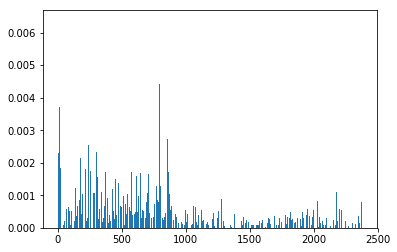

In [11]:
plt.bar(range(len(model_rf.feature_importances_)), model_rf.feature_importances_)
plt.show()

In [12]:
imp_predictors = []
threshold =0.0
for i,j in enumerate(model_rf.feature_importances_):
    if j > threshold:
        imp_predictors.append(i)
print(len(imp_predictors))

1851


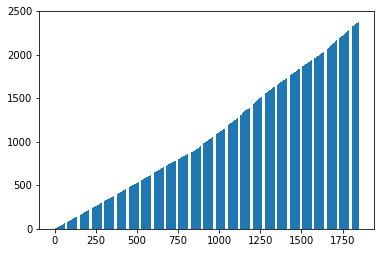

In [13]:
plt.bar(range(len(imp_predictors)), imp_predictors)
plt.show()

In [14]:
features = [xcols for xcols in X.columns if xcols != 'Col1']

In [15]:
predictors = [features[feat] for feat in imp_predictors ]
#for feat in imp_predictors:
    #print(features[feat])
    #predictors.append(features[feat])
    #print(predictors)

In [16]:
len(predictors)

1851

In [17]:
X_new = feature_scale(bank_train, predictors)
print(X_new.shape)

(17521, 1851)


In [18]:
def model_clf(alg,dtrain,target,predictors):
    #Get the important features from the training dataframe
    X_new = feature_scale(bank_train, predictors)
    #Split the data in training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_new, target,test_size=0.2,
                                                    random_state=42)
    #Fit the algorithm on training and testing data
    alg.fit(X_train,y_train)
    
    #Get the report based on test data:
    get_score_report(alg,X_test,y_test)
    
    #print total misclassfied sample
    y_pred = alg.predict(X_test)
    print('Misclassified samples: %d' % (y_test != y_pred).sum())
    
    return alg

In [30]:
model_rf_1 = RandomForestClassifier()
model_rf_1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
#Add grid Search Logic:
param_grid=dict(bootstrap =[True,False],
                max_depth =[1,3,5],
                #min_samples_leaf=[1,3,5,7],
                n_estimators =[2,4,6],
                class_weight=['balanced',None]
               )

model_grid = GridSearchCV(estimator=model_rf_1, cv=5, param_grid=param_grid)

In [31]:
alg=model_clf(model_rf_1, bank_train, target, predictors)

[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.90      0.99      0.95      3150
          1       0.49      0.07      0.12       355

avg / total       0.86      0.90      0.86      3505

*************** Accuracy Score ***************
0.8984308131241084
*************** Confussion Matrix ***************
[[3124   26]
 [ 330   25]]
*************** F1 Score ***************
0.12315270935960593
Misclassified samples: 356


In [33]:
alg=model_clf(model_grid, bank_train, target, predictors)

[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.90      1.00      0.95      3150
          1       0.56      0.01      0.03       355

avg / total       0.87      0.90      0.85      3505

*************** Accuracy Score ***************
0.8990014265335236
*************** Confussion Matrix ***************
[[3146    4]
 [ 350    5]]
*************** F1 Score ***************
0.027472527472527472
Misclassified samples: 354


In [34]:
alg.best_params_

{'bootstrap': False, 'class_weight': None, 'max_depth': 5, 'n_estimators': 4}

In [41]:
X_bank_test =feature_scale(bank_test,predictors) 
create_csv_test(alg,'submission_rand_forr.csv', X_bank_test)

In [51]:
X_bank_test =feature_scale(bank_test,predictors) 
create_csv_test(alg,'submission_rand_gd.csv', X_bank_test)

In [52]:
model_grid.best_params_

{'bootstrap': False, 'class_weight': None, 'max_depth': 5, 'n_estimators': 6}

In [53]:
model_grid.best_score_

0.900185502283105

In [55]:
#Add grid Search Logic:
param_grid=dict(bootstrap =[False],
                max_depth =[5,7,9],
                #min_samples_leaf=[1,3,5,7],
                n_estimators =[6,7,8]
               )

model_grid2 = GridSearchCV(estimator=model_rf, cv=5, param_grid=param_grid)

In [56]:
alg=model_clf(model_grid2, bank_train, target, predictors)

[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.90      1.00      0.95      3150
          1       0.55      0.02      0.03       355

avg / total       0.86      0.90      0.85      3505

*************** Accuracy Score ***************
0.8990014265335236
*************** Confussion Matrix ***************
[[3145    5]
 [ 349    6]]
*************** F1 Score ***************
0.03278688524590164
Misclassified samples: 354


In [ ]:
model_grid2.best_params_

In [63]:
model_lr = LogisticRegression(C=500)
alg=model_clf(model_lr, bank_train, target, predictors)

[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.90      0.95      0.93      3150
          1       0.21      0.11      0.15       355

avg / total       0.83      0.87      0.85      3505

*************** Accuracy Score ***************
0.8670470756062767
*************** Confussion Matrix ***************
[[2999  151]
 [ 315   40]]
*************** F1 Score ***************
0.1465201465201465
Misclassified samples: 466


In [60]:
X_bank_test =feature_scale(bank_test,predictors) 
create_csv_test(alg,'submission_log_reg_C.csv', X_bank_test)

In [27]:
model1 = DecisionTreeClassifier(random_state=1)
model2 = KNeighborsClassifier()
model3= LogisticRegression(random_state=1)

In [28]:
print("***Decision Tree***")
#model1=model_clf(model1, bank_train, target, predictors)
print("***KNN ***")
model2=model_clf(model2, bank_train, target, predictors)
print("*** Log Reg***")
#model3=model_clf(model3, bank_train, target, predictors)

***Decision Tree***
***KNN ***
[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.90      0.99      0.94      3150
          1       0.30      0.03      0.05       355

avg / total       0.84      0.90      0.85      3505

*************** Accuracy Score ***************
0.8952924393723253
*************** Confussion Matrix ***************
[[3129   21]
 [ 346    9]]
*************** F1 Score ***************
0.04675324675324675
Misclassified samples: 367
*** Log Reg***


In [20]:
from sklearn.ensemble import VotingClassifier
model_vote = VotingClassifier(estimators=[('lr', model3), ('dt', model1), ('kn', model2)], voting='soft')
model_vote = model_clf(model_vote, bank_train, target, predictors)

/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3150
          1       0.28      0.06      0.11       355

avg / total       0.84      0.89      0.86      3505

*************** Accuracy Score ***************
0.8884450784593438
*************** Confussion Matrix ***************
[[3091   59]
 [ 332   23]]
*************** F1 Score ***************
0.10526315789473684
Misclassified samples: 391


/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
model_vote.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=1,
             splitter='best'),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform')]

In [25]:
model_vote.voting

'soft'

In [26]:
X_bank_test =feature_scale(bank_test,predictors) 
create_csv_test(model_vote,'submission_vote3.csv', X_bank_test)

/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
X_bank_test =feature_scale(bank_test,predictors) 
create_csv_test(model2,'submission_vknn.csv', X_bank_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier(DecisionTreeClassifier(random_state=1))
model_bag=model_clf(model_bag, bank_train, target, predictors)

In [39]:
from sklearn.ensemble import AdaBoostClassifier
model_ad = AdaBoostClassifier(random_state=1)
model_ad=model_clf(model_ad, bank_train, target, predictors)

[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3150
          1       0.34      0.07      0.12       355

avg / total       0.85      0.89      0.86      3505

*************** Accuracy Score ***************
0.891583452211127
*************** Confussion Matrix ***************
[[3099   51]
 [ 329   26]]
*************** F1 Score ***************
0.12037037037037036
Misclassified samples: 380


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.001,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.901245243860256

In [37]:
get_score_report(model,X_test,y_test)

[0 0 0 ... 0 0 0]
*************** Classification Report ***************


             precision    recall  f1-score   support

          0       0.91      0.99      0.95      5211
          1       0.43      0.09      0.16       571

avg / total       0.86      0.90      0.87      5782

*************** Accuracy Score ***************
0.8983050847457628
*************** Confussion Matrix ***************
[[5140   71]
 [ 517   54]]
*************** F1 Score ***************
0.15517241379310345
